# Clustering attempts.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
df = pd.read_csv("mc_san_gaia_lam.csv")
df

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,kepid,Mass_berger,KIC,Kp,Q,Teff_santos,E_Teff,e_Teff,logg_santos,...,color_teffs,log_age,age,vx,vy,vz,x,y,z,vb
0,2,1026474,0.669055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4026.558638,7.338434,0.021799,18.851932,237.681874,22.697860,-7.991995,0.344720,0.063485,15.602643
1,3,1162635,0.663326,1162635.0,15.802,1-17,3758.0,45.0,50.0,4.756,...,3892.908102,8.801172,0.632663,NaN,NaN,NaN,-7.965284,0.418703,0.076267,-11.929150
2,4,1164102,0.633985,1164102.0,15.274,1-17,4203.0,126.0,139.0,4.636,...,4048.484918,9.363715,2.310549,NaN,NaN,NaN,-8.003703,0.318483,0.056665,13.596025
3,5,1292688,0.519125,1292688.0,15.823,1-17,3776.0,68.0,75.0,4.726,...,3785.473785,9.437599,2.739042,NaN,NaN,NaN,-8.025556,0.256983,0.048534,-14.155903
4,6,1297303,0.669033,1297303.0,15.494,1-17,4451.0,121.0,134.0,4.609,...,4316.554097,9.357515,2.277797,NaN,NaN,NaN,-7.958546,0.446250,0.078027,16.651520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35323,38704,12884589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5959.030161,9.030023,1.071576,-12.710633,232.069589,6.702370,-8.015745,0.923139,0.286498,3.793384
35324,38705,12934451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5770.633278,9.243835,1.753214,12.645033,230.128263,16.433961,-8.019220,0.904224,0.280548,12.807173
35325,38706,12934465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4750.924050,9.594891,3.934510,NaN,NaN,NaN,-8.050395,0.635158,0.197265,8.648168
35326,38707,12934525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5282.823374,9.425544,2.664061,NaN,NaN,NaN,-8.019369,0.907043,0.281263,-1.165221


Text(0, 0.5, 'vy')

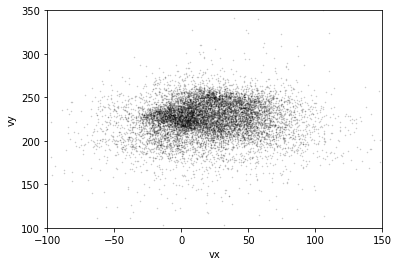

In [12]:
plt.plot(df.vx, df.vy, "k.", ms=1, alpha=.2)
plt.xlim(-100, 150)
plt.ylim(100, 350)
plt.xlabel("vx")
plt.ylabel("vy")

Text(0, 0.5, 'vz')

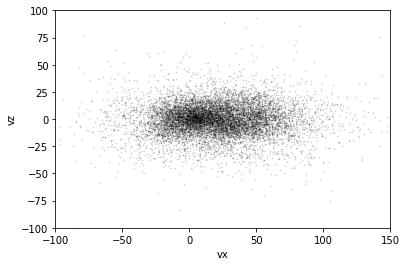

In [45]:
plt.plot(df.vx, df.vz, "k.", ms=1, alpha=.2)
plt.xlim(-100, 150)
plt.ylim(-100, 100)
plt.xlabel("vx")
plt.ylabel("vz")

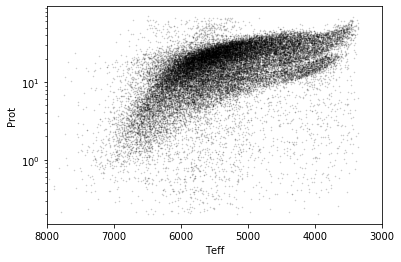

In [15]:
plt.plot(df.color_teffs, df.Prot, "k.", ms=1, alpha=.2)
plt.xlim(8000, 3000)
# plt.ylim(100, 350)
plt.xlabel("Teff")
plt.ylabel("Prot")
plt.yscale("log")

Automatically created module for IPython interactive environment
(1500, 2) (1500,)
[[-5.19811282  0.64186932]]
[1 1 0 ... 2 2 2]


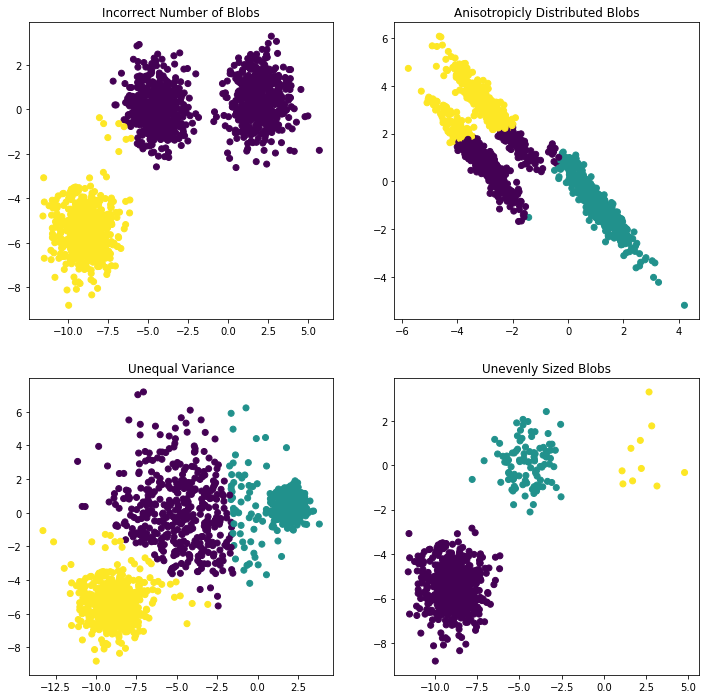

In [23]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
print(np.shape(X), np.shape(y))
print(X[:1])
print(y)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [46]:
m = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) & np.isfinite(df.vz.values)
m &= (-100 < df.vx.values) & (df.vx.values < 150)
m &= (100 < df.vy.values) & (df.vy.values < 350)
m &= (-100 < df.vz.values) & (df.vz.values < 100)
vx, vy, vz = df.vx.values[m], df.vy.values[m], df.vz.values[m]

(11010, 3)


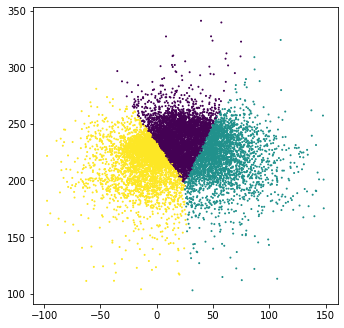

In [47]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

X = np.vstack((vx, vy, vz)).T
print(np.shape(X))

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)

(11010, 2)


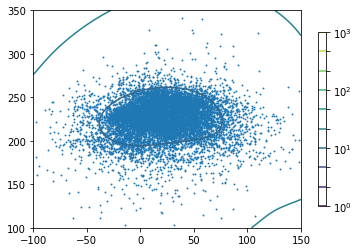

In [51]:
from sklearn import mixture
from matplotlib.colors import LogNorm

X_train = np.vstack((vx, vy)).T
print(np.shape(X_train))

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-100., 150.)
y = np.linspace(100., 350.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)